<h3 style="color: #8ED2D9"> 1.Importacion y revision de dataset con data limpia </h3> 

In [1]:
#Se importan las liberias necesarias
import pandas as pd
import numpy as np

In [2]:
#Se importa el csv con la data limpia
#Se utiliza el codigo sep, porque el archivo se delimita por comas  ","
#Se utliza el codigo index_col, para utlizar la primer columna como index
rawData = pd.read_csv('default of credit card clients.csv', sep=",",index_col=0)
rawData.head()

,ID,LIMIT_BAL,AGE,FEMALE,MALE,MARRIED,SINGLE,DIVORCED,OTHERS,GRADUATE SCHOOL,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,NOT DEFAULT
0,1,20000,24,1,0,1,0,0,0,0,...,0,0,0,689,0,0,0,0,1,0
1,2,120000,26,1,0,0,1,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,0
2,3,90000,34,1,0,0,1,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,1
3,4,50000,37,1,0,1,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,1
4,5,50000,57,0,1,1,0,0,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,1


In [3]:
rawData.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'FEMALE', 'MALE', 'MARRIED', 'SINGLE',
       'DIVORCED', 'OTHERS', 'GRADUATE SCHOOL', 'HIGH SCHOOL', 'UNIVERSITY',
       'OTHER', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'DEFAULT', 'NOT DEFAULT'],
      dtype='object')

In [4]:
#Se revisan las variables
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 30202
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               30000 non-null  int64
 1   LIMIT_BAL        30000 non-null  int64
 2   AGE              30000 non-null  int64
 3   FEMALE           30000 non-null  int64
 4   MALE             30000 non-null  int64
 5   MARRIED          30000 non-null  int64
 6   SINGLE           30000 non-null  int64
 7   DIVORCED         30000 non-null  int64
 8   OTHERS           30000 non-null  int64
 9   GRADUATE SCHOOL  30000 non-null  int64
 10  HIGH SCHOOL      30000 non-null  int64
 11  UNIVERSITY       30000 non-null  int64
 12  OTHER            30000 non-null  int64
 13  PAY_0            30000 non-null  int64
 14  PAY_2            30000 non-null  int64
 15  PAY_3            30000 non-null  int64
 16  PAY_4            30000 non-null  int64
 17  PAY_5            30000 non-null  int64
 18  PAY_6 

<h3 style="color: #8ED2D9"> 2.Seleccion de variables para machine learning</h3> 

In [5]:
#Definicions de variables independientes
x = rawData.iloc[:,13:19]
x

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
...,...,...,...,...,...,...
30198,0,0,0,0,0,0
30199,-1,-1,-1,-1,0,0
30200,4,3,2,-1,0,0
30201,1,-1,0,0,0,-1


In [6]:
#Definicion de variable dependiente
y = rawData["NOT DEFAULT"]
y

0        0
1        0
2        1
3        1
4        1
        ..
30198    1
30199    1
30200    0
30201    0
30202    0
Name: NOT DEFAULT, Length: 30000, dtype: int64

<h3 style="color: #8ED2D9"> 3. Seleccion del modelo correcto de prediccion </h3> 

In [7]:
#Importacion de liberia Sklearn
from sklearn.linear_model import LinearRegression

In [8]:
model=LinearRegression()

In [9]:
# Importacion de liberias
import numpy as np
import pandas as pd
import scipy 
from math import sqrt
import matplotlib.pyplot as plt

#Importacion de estimadores

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Modelo de metricas

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#Validacion cruzada
#from sklearn.cross_validation  import  train_test_split
from sklearn.model_selection import train_test_split

In [10]:
#Validacion cruzada para cada modelo
print(cross_val_score(model,x,y,cv=3))

[0.0936071  0.11887959 0.11223656]


In [11]:
#Creacion de listas para cada algoritmo de regression

algosClass=[]

algosClass.append(("Random Forest Regressor",RandomForestRegressor()))

algosClass.append(("Linear Regression",LinearRegression()))

algosClass.append(("Support Vector Regression",SVR()))

In [12]:
#Algoritmo para obtener r2 al cuadrado para cada modelo de regresion
results=[]
names=[]

for name, model in algosClass:
        result=cross_val_score(model,x,y,cv=3,scoring="r2")
        names.append(name)
        results.append(result)
        
for i in range (len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.17294344978826523
Linear Regression 0.10824108525601357
Support Vector Regression 0.1239847810059694


<p><b>Segun la revision de los resultados, se utlizara el modelo de Ramdon Forest Regressor, 
ya que tiene la puntuacion mas lata de los 3 modelos<p><b>

<h3 style="color: #8ED2D9"> 4. Division de la data y aplicacion de modelo seleccionado </h3> 

In [13]:
#Division del set datos en 20% en test y 80% en train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(24000, 6) (6000, 6) (24000,) (6000,)


In [14]:
#Seleccion de modelo y puesta de variables de entrenamiento
algo=RandomForestRegressor()

models=algo.fit(x_train,y_train)

In [15]:
#Puesta en marcha de predicciones del modelo
predictions=models.predict(x_test)

In [16]:
#Importacion de librerias de metricas MSE (error cuadratico medio) Y R2 (error cuadratico)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [17]:
#Algoritmo para calcular RMSE (Raiz del erro cuadratico medio (MSE)) y comparar las predicciones
rmse=sqrt(mean_squared_error(y_test,predictions))

In [18]:
#Algoritmo para comparar las predcciones con r2
predRsquared=r2_score(y_test,predictions)

In [19]:
print("R squared: %.3f" % predRsquared)
print("RMSE:%.3f" % rmse)

R squared: 0.176
RMSE:0.379


<h3 style="color: #8ED2D9">5.Graficado de predicciones del modelo </h3> 

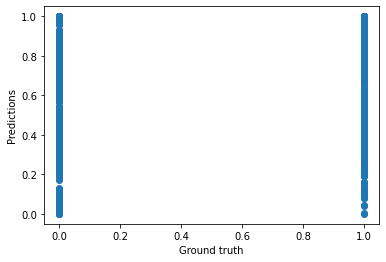

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x=y_test,y=predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")
plt.show()

In [21]:
rawData2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
rawData2

,Actual,Predicted
13014,1,0.388591
10511,1,0.878680
1655,1,0.868429
9324,1,0.895615
27205,1,0.895615
...,...,...
3836,0,0.672827
28830,1,0.856534
18576,1,0.494107
30028,1,0.895615


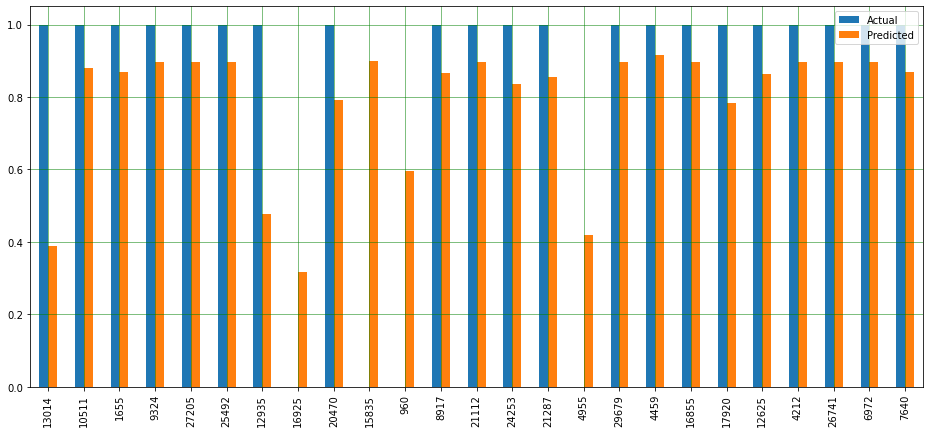

In [22]:
rawData3 = rawData2.head(25)
rawData3.plot(kind='bar',figsize=(16,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<p><b> De los resultados anteriores, se puede decir que los valores superiores a 0.5, 
son Not Default,por tanto esos ID de clientes no recibiran un prestamo, por probabilidad de incumplimiento. Y valores superiores a 0.5, seran Default, por consiguiente, esos ID de clientes, si recibiran el prestamo, por tener probabilidad de pago. <p><b>